In [141]:
import pandas as pd

In [142]:
supporting_df =  pd.read_csv('supporting.csv')
supporting_df.time_spent_on_app = supporting_df.time_spent_on_app.round(2)

In [143]:
df_promotions = pd.read_csv('data/promotions.csv')

In [144]:
df_promotions = df_promotions.merge(supporting_df[['WEEK_NO','HOUSEHOLD_KEY','time_spent_on_app']], on=['WEEK_NO','HOUSEHOLD_KEY'], how='left')



In [145]:
df_promotions['time_spent_on_app'] = df_promotions.sort_values('WEEK_NO').groupby('HOUSEHOLD_KEY')['time_spent_on_app'].shift(-1)

df_promotions.head()


,WEEK_NO,HOUSEHOLD_KEY,TIME_IN_APP,NUM_COUPONS,time_spent_on_app
0,1,1,11,0,NaN
1,1,7,11,0,NaN
2,1,8,11,0,NaN
3,1,13,11,0,NaN
4,1,16,11,0,NaN


In [146]:
df_promotions.sort_values('HOUSEHOLD_KEY').head()

,WEEK_NO,HOUSEHOLD_KEY,TIME_IN_APP,NUM_COUPONS,time_spent_on_app
0,1,1,11,0,NaN
20826,27,1,11,0,69.82
21627,28,1,66,0,64.45
78498,99,1,58,0,57.91
22428,29,1,11,0,65.50


In [147]:
df_promotions = df_promotions.drop('TIME_IN_APP', axis=1)

In [148]:
df_promotions.head()

,WEEK_NO,HOUSEHOLD_KEY,NUM_COUPONS,time_spent_on_app
0,1,1,0,NaN
1,1,7,0,NaN
2,1,8,0,NaN
3,1,13,0,NaN
4,1,16,0,NaN


In [149]:
df_promotions = df_promotions.rename(columns={'time_spent_on_app': 'TIME_IN_APP'})

In [150]:
supporting_df.head()

,HOUSEHOLD_KEY,WEEK_NO,time_spent_on_app,supporting
0,1,1,NaN,NaN
1,1,2,NaN,NaN
2,1,3,NaN,NaN
3,1,4,NaN,NaN
4,1,5,NaN,NaN


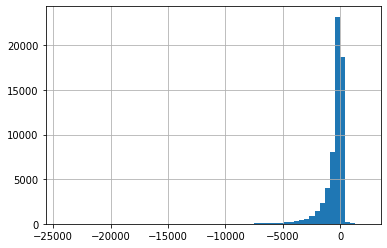

In [151]:
import matplotlib.pyplot as plt

supporting_df.supporting.hist(bins=60)

In [152]:
df_promotions = df_promotions.merge(supporting_df[['WEEK_NO','HOUSEHOLD_KEY','supporting']], on=['WEEK_NO','HOUSEHOLD_KEY'], how='left')


In [157]:
df_promotions

,WEEK_NO,HOUSEHOLD_KEY,NUM_COUPONS,TIME_IN_APP,WEEKLY_BONUS_POINTS
0,1,1,0,NaN,NaN
1,1,7,0,NaN,NaN
2,1,8,0,NaN,NaN
3,1,13,0,NaN,NaN
4,1,16,0,NaN,NaN
...,...,...,...,...,...
81697,102,2494,0,NaN,-1238.16739
81698,102,2496,0,NaN,73.10600
81699,102,2497,0,NaN,-534.73962
81700,102,2498,0,NaN,9.49522


In [154]:
df_promotions = df_promotions.rename(columns={'supporting': 'WEEKLY_BONUS_POINTS'})

In [155]:
df_promotions.WEEKLY_BONUS_POINTS = df_promotions.WEEKLY_BONUS_POINTS.round(5)

In [156]:
df_promotions.to_csv('data_new/promotions.csv', index=False)

In [135]:
df_transactions = pd.read_csv('data/transactions.csv')
df_demographics = pd.read_csv('data/demographics.csv')
df_products = pd.read_csv('data/products.csv')
df_campaigns = pd.read_csv('data/campaigns.csv')

In [140]:
df_promotions.head()

,WEEK_NO,HOUSEHOLD_KEY,NUM_COUPONS,TIME_IN_APP,WEEKLY_BONUS_POINTS
0,1,1,0,NaN,NaN
1,2,1,0,NaN,NaN
2,3,1,0,NaN,NaN
3,4,1,0,NaN,NaN
4,5,1,0,NaN,NaN


In [136]:

df_transactions.DISCOUNT = df_transactions.DISCOUNT.round(2)
df_transactions.SALES_VALUE = df_transactions.SALES_VALUE.round(2)

In [138]:
df_transactions[(df_transactions['DISCOUNT']<0.0000002) & (df_transactions['DISCOUNT']>0)]

,DAY,WEEK_NO,HOUSEHOLD_KEY,PRODUCT_ID,SALES_VALUE,QUANTITY,DISCOUNT


In [137]:
df_transactions.to_csv('data_new/transactions.csv', index=False)
df_demographics.to_csv('data_new/demographics.csv', index=False)
df_products.to_csv('data_new/products.csv', index=False)
df_campaigns.to_csv('data_new/campaigns.csv', index=False)